# Maturità 2023 (suppletiva) - Quesito 3

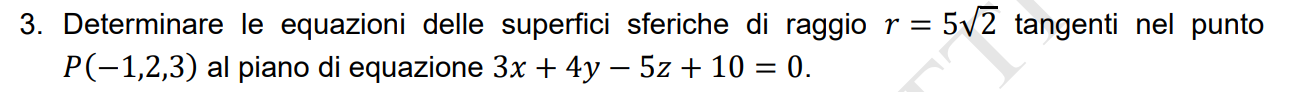

Determinare le equazioni delle superfici sferiche di raggio $r=5\sqrt{2}$ tangenti nel punto $P(−1,2,3)$ al piano di equazione $3x + 4y − 5z + 10 = 0$.

In [1]:
# Toolbox simbolico
from sympy import *

In [2]:
r = 5*sqrt(2)
r

5*sqrt(2)

## Equazione sfera di raggio $r$

In [3]:
x,y,z = symbols('x,y,z', real=True)
x0,y0,z0 = symbols('x0,y0,z0', real=True)

In [4]:
# Centro
C = Array([x0,y0,z0])
C

[x0, y0, z0]

In [5]:
S = Eq((x-x0)**2+(y-y0)**2+(z-z0)**2,r**2)
S

Eq((x - x0)**2 + (y - y0)**2 + (z - z0)**2, 50)

## Passaggio per $P$

In [6]:
P = Array([-1,2,3])
P

[-1, 2, 3]

In [7]:
Pvincolo = S.subs([(x,P[0]),(y,P[1]),(z,P[2])])
# Pvincolo = expand(Pvincolo)
Pvincolo

Eq((2 - y0)**2 + (3 - z0)**2 + (-x0 - 1)**2, 50)

## PIano

In [8]:
piano = Eq(3*x+4*y-5*z+10,0)
piano

Eq(3*x + 4*y - 5*z + 10, 0)

In [9]:
## Piano vettore normale
n = Array([3,4,-5])
n

[3, 4, -5]

## Condizioni di tangenza

In [10]:
t = symbols('t', real=True)

In [11]:
# n deve essere parallelo a PC
PC = P - C
display(PC)
Tanvincolo1 = Eq(n[0]*t, PC[0])
Tanvincolo2 = Eq(n[1]*t, PC[1])
Tanvincolo3 = Eq(n[2]*t, PC[2])
Tanvincolo = [Tanvincolo1, Tanvincolo2, Tanvincolo3] 
Tanvincolo

[-x0 - 1, 2 - y0, 3 - z0]

[Eq(3*t, -x0 - 1), Eq(4*t, 2 - y0), Eq(-5*t, 3 - z0)]

Non sto scrivendo altro che l'equazione di una retta in forma parametrica

## Sistema da risolvere

In [12]:
display(Pvincolo)
display(Tanvincolo)

Eq((2 - y0)**2 + (3 - z0)**2 + (-x0 - 1)**2, 50)

[Eq(3*t, -x0 - 1), Eq(4*t, 2 - y0), Eq(-5*t, 3 - z0)]

In [13]:
x0sol = solve(Tanvincolo1,x0)[0]
x0sol

-3*t - 1

In [14]:
y0sol = solve(Tanvincolo2,y0)[0]
y0sol

2 - 4*t

In [15]:
z0sol = solve(Tanvincolo3,z0)[0]
z0sol

5*t + 3

In [16]:
Pvin = Pvincolo.subs([(x0,x0sol),(y0,y0sol),(z0,z0sol)])
Pvin

Eq(50*t**2, 50)

In [17]:
tsols = solve(Pvin,t)
tsols

[-1, 1]

## Caso 1: $t=1$

In [18]:
tsol = tsols[0]
tsol

-1

In [19]:
x0val = x0sol.subs(t,tsol)
y0val = y0sol.subs(t,tsol)
z0val = z0sol.subs(t,tsol)
display(x0val, y0val, z0val)

2

6

-2

In [20]:
C1 = C.subs([(x0,x0val),(y0,y0val),(z0,z0val)])
C1

[2, 6, -2]

In [21]:
S.subs([(x0,x0val),(y0,y0val),(z0,z0val)])

Eq((x - 2)**2 + (y - 6)**2 + (z + 2)**2, 50)

## Caso 1: $t=-1$

In [22]:
tsol = tsols[1]
tsol

1

In [23]:
x0val = x0sol.subs(t,tsol)
y0val = y0sol.subs(t,tsol)
z0val = z0sol.subs(t,tsol)
display(x0val, y0val, z0val)

-4

-2

8

In [24]:
C2 = C.subs([(x0,x0val),(y0,y0val),(z0,z0val)])
C2

[-4, -2, 8]

In [25]:
S.subs([(x0,x0val),(y0,y0val),(z0,z0val)])

Eq((x + 4)**2 + (y + 2)**2 + (z - 8)**2, 50)

In [26]:
zpiano = solve(piano,z)[0]
zpiano

3*x/5 + 4*y/5 + 2

## Grafico caso 2

In [27]:
from sympy.abc import theta, phi
from sympy.plotting.plot import plot3d_parametric_surface

In [28]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [31]:
r, C1, C2

(5*sqrt(2), [2, 6, -2], [-4, -2, 8])

<IPython.core.display.Javascript object>


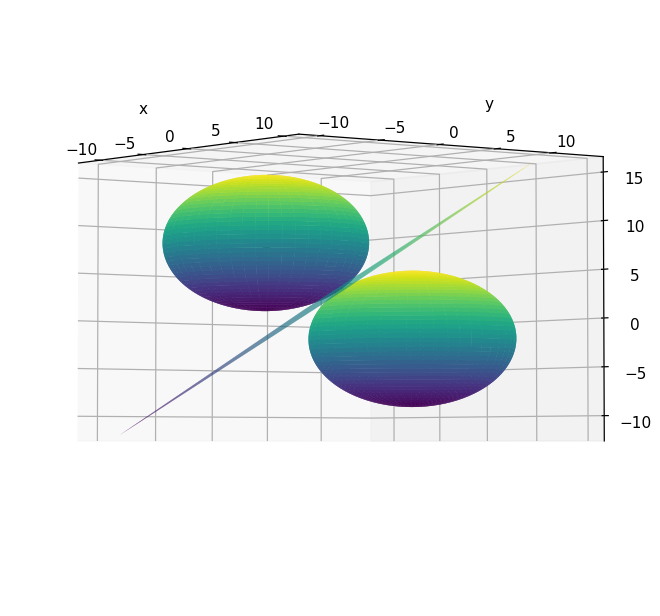

In [33]:
plt.rcParams['figure.figsize'] = 6, 5.6

p1 = plotting.plot3d(zpiano, (x, -10, 10), (y, -10, 10), markers=[{'args': [[P[0], C2[0]], [P[1], C2[1]], [P[2], C2[2]], 'ko']}], show=False)
p2 = plot3d_parametric_surface(r*sin(phi) * cos(theta)+C2[0], r*sin(phi) * sin(theta)+C2[1], r*cos(phi)+C2[2], (phi, 0, pi), (theta, 0, 2 * pi), show=False)
p3 = plot3d_parametric_surface(r*sin(phi) * cos(theta)+C1[0], r*sin(phi) * sin(theta)+C1[1], r*cos(phi)+C1[2], (phi, 0, pi), (theta, 0, 2 * pi), show=False)

p1.append(p2[0])
p1.append(p3[0])
p1.show()